# Aplicações Topológicas no Estudo de Fronteiras de Pareto

A análise das fronteiras de Pareto pode ser enriquecida por uma perspectiva topológica, onde a **topologia de fronteiras de Pareto** é estudada para identificar a estrutura e as relações entre as soluções ótimas. A topologia fornece uma linguagem poderosa para descrever as propriedades de continuidade e conectividade das soluções, explorando, por exemplo, se as fronteiras de Pareto formam formas conectadas ou desconectadas e como essas fronteiras podem ser modeladas em espaços de alta dimensão.

Neste contexto, podemos utilizar ferramentas de **topologia algébrica** para estudar a estrutura dessas fronteiras, identificando conexões e pontos críticos em regiões do espaço de soluções. O uso de grafos para representar essas fronteiras torna-se uma abordagem útil, onde cada nó representa uma solução e as arestas entre os nós indicam a relação de dominância ou a proximidade topológica entre as soluções. Essa estrutura gráfica pode ser explorada para entender a conectividade e as propriedades das fronteiras de Pareto, além de permitir a identificação de clusters ou regiões do espaço de soluções com características similares.

## Construção de Grafos para Estudo de Fronteiras de Pareto

O código fornecido visa construir um **grafo de vizinhança** entre pontos de um conjunto de soluções, onde as arestas representam relações de não-dominância entre os pontos. Esse grafo é gerado a partir de um conjunto de pontos $P = \{p_1, p_2, \dots, p_n\}$, com a adição de arestas entre os pontos que não possuem interseções no espaço de soluções, determinado por um **ponto de referência** $r$. As arestas indicam soluções que são vizinhas na análise de Pareto, ou seja, soluções que podem ser comparadas diretamente em termos de dominância.

Além disso, a verificação de **interseções** entre os segmentos de reta conectando os pontos ajuda a identificar aquelas soluções que são separadas por outras, evitando a inclusão de soluções dominadas no grafo. Através desse grafo, é possível visualizar a conectividade das soluções, observar padrões de proximidade e até realizar uma análise mais profunda da forma das fronteiras de Pareto.

## Objetivo da Análise

O objetivo principal desta análise é compreender a **topologia das fronteiras de Pareto** através da representação gráfica de soluções ótimas, onde a conectividade dos pontos reflete a relação de não-dominância entre eles. A topologia desse grafo pode fornecer insights importantes sobre a distribuição das soluções, a existência de clusters de soluções eficientes e a forma da fronteira de Pareto. A exploração topológica desses grafos abre novas possibilidades para otimização em múltiplos critérios, permitindo não apenas encontrar soluções ótimas, mas também entender como essas soluções estão distribuídas no espaço de soluções e como elas podem ser acessadas de maneira eficiente.

Dessa forma, ao aplicar conceitos topológicos e gráficos à análise de fronteiras de Pareto, estamos desenvolvendo uma ferramenta poderosa para a exploração e compreensão de problemas complexos de otimização, com implicações que se estendem desde a engenharia até as ciências sociais e econômicas.

In [7]:
def check_intersection(p, r, a, b):
    """
    Verifica se o segmento de reta aberto (a, b) intercepta o paralelepípedo P dado pelos pontos p e r.
    """
    for i in range(len(p)):
        # Projeção do paralelepípedo no eixo i
        min_p = min(p[i], r[i])
        max_p = max(p[i], r[i])
        
        # Projeção da reta no eixo i
        min_l = min(a[i], b[i])
        max_l = max(a[i], b[i])
        
        # Verifica se os intervalos se sobrepõem
        if max_p <= min_l or max_l <= min_p:
            return False
    return True

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_3d_intersection(p, r, a, b, intersect):
    """
    Plota o paralelepípedo e o segmento de reta, e indica se houve interseção.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Paralelepípedo
    # Gerar as 8 coordenadas do paralelepípedo
    corners = np.array([[p[0], p[1], p[2]], [r[0], p[1], p[2]], [r[0], r[1], p[2]], [p[0], r[1], p[2]], 
                        [p[0], p[1], r[2]], [r[0], p[1], r[2]], [r[0], r[1], r[2]], [p[0], r[1], r[2]]])
    
    # Faces do paralelepípedo (pares de índices que formam as faces)
    faces = [[0,1,2,3], [4,5,6,7], [0,1,5,4], [2,3,7,6], [0,3,7,4], [1,2,6,5]]
    
    # Plot do paralelepípedo
    ax.add_collection3d(Poly3DCollection([corners[face] for face in faces], color='green', linewidths=1, edgecolors='r', alpha=0.25))
    
    # Reta
    ax.plot([a[0], b[0]], [a[1], b[1]], [a[2], b[2]], color='blue', linewidth=1)

    # Ajustes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Interseção' if intersect else 'Sem Interseção')
    plt.show()

In [14]:
def plot_2d_intersection(p, r, a, b, intersect):
    """
    Plota o paralelepípedo e o segmento de reta, e indica se houve interseção em R^2.
    """
    fig, ax = plt.subplots()

    # Paralelepípedo: Representado por um quadrado (retângulo) no plano R^2
    corners = np.array([[p[0], p[1]], [r[0], p[1]], [r[0], r[1]], [p[0], r[1]], [p[0], p[1]]])
    
    # Plot do paralelepípedo
    ax.plot(corners[:, 0], corners[:, 1], color='red', linewidth=2, label="Paralelepípedo", alpha=0.5)
    
    # Reta
    ax.plot([a[0], b[0]], [a[1], b[1]], color='blue', linewidth=2, label="Reta")

    # Ajustes de plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Interseção' if intersect else 'Sem Interseção')
    ax.legend()
    plt.grid(True)
    plt.show()

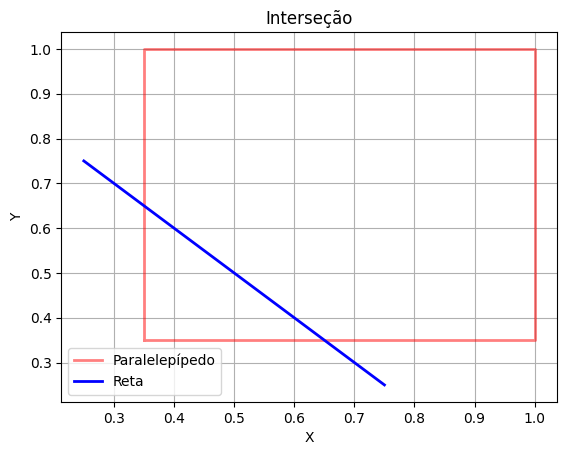

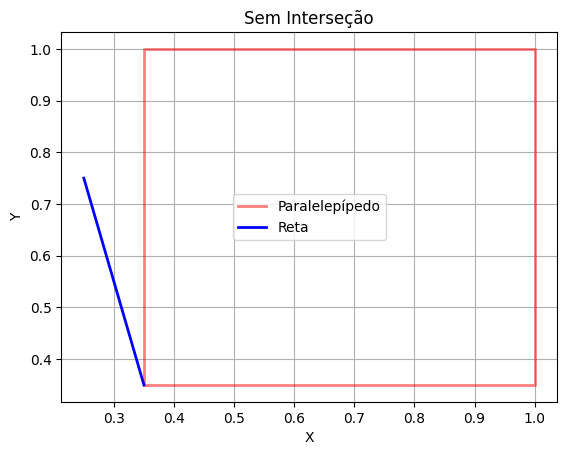

In [15]:
ex = np.array([
    [0.75, 0.25],
    [0.35, 0.35],
    [0.25, 0.75]
])
ref = [1, 1]

# Verifica se há interseção
intersect1 = check_intersection(ex[1], ref, ex[0], ex[2])
plot_2d_intersection(ex[1], ref, ex[0], ex[2], intersect1)

# Verifica se há interseção
intersect2 = check_intersection(ex[1], ref, ex[1], ex[2])
plot_2d_intersection(ex[1], ref, ex[1], ex[2], intersect2)

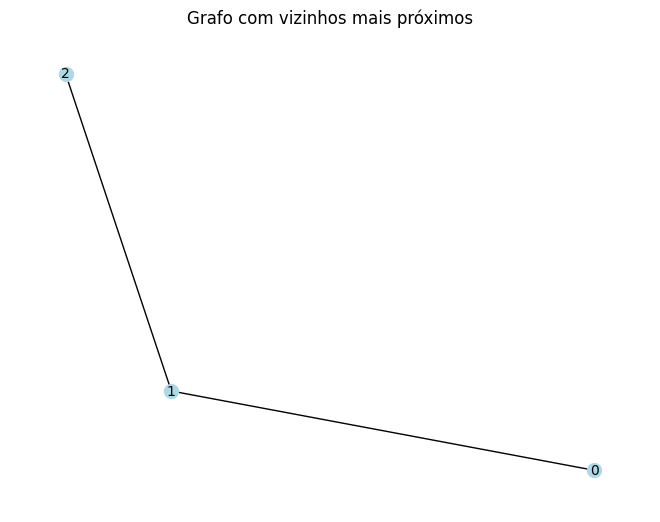

In [19]:
import networkx as nx

def build_graph(points, ref_point):
    G = nx.Graph()

    # Adiciona os vértices
    for i, p in enumerate(points):
        G.add_node(i, point=p)
        
    for i, p in enumerate(points):
        for j, q in enumerate(points):
            if np.array_equal(p, q):
                continue
            add = True
            for k, r in enumerate(points):
                if np.array_equal(r, p) or np.array_equal(r, q):
                    continue
                if check_intersection(r, ref_point, p, q):
                    add = False
                    break
            if add:
                G.add_edge(i,j)
    return G       

graph = build_graph(ex, ref)

# Exibir a posição dos pontos (nos do grafo)
pos = nx.get_node_attributes(graph, 'point')

# Visualizar o grafo
import matplotlib.pyplot as plt
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos")
plt.show()     
    